## Classify cancer cell samples as benign (non-cancerous) or malignant (cancerous) using Support vector machine (SVM) algorithm
### Goal:
Our goal is to build a SVM model by training the data for human cells into benign or malignant state. The Data is from http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29.  The formatted data was downloaded from here https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv 

 In SVM, the data points are classified by constructing hyperplanes between them in a higher-dimensional feature space, it is useful when the data is not linearly separable. The construction of hyperplane  depends on the choice of the kernel funnction used and is the most important model parameter you can tune. "Kernel" refers to a method of using linear classifier to a non-linear problem. The kernal functions maps the original non-linear observations into a higher-dimesional space which then become separable. 

`We shall apply various SVM kernel to explore the differences. 
Linear, Polynomial, RBF, Sigmoid
Within kernel function, there are two regularization parameters: C and \gamma
Steps to model the data file "cell_samples_for_svm.csv"
(1) Import python library
(2) Description of data: shape, size, type, null
(3) Constructing training set and test test using sci-kit library
(4) Training model using 4 different Kernels in SVM and making inteference `

## Four common kernels in SVM:

 | Kernel Name | Formula $K(x_{n},x_{i})$ used in Kerneling  |Optimization Parameter|
 |----------------|:----------------|:----------------|
 |  Linear    |$K(x_{n},x_{i})=(x_{n},x_{i})$  | C,$\gamma$ |
 | Polynomial |$K(x_{n},x_{i})=(\gamma(x_{n},x_{i})+r)^{d}$    |C,$\gamma$ , r, $\gamma$ |
 | RBF        |$K(x_{n},x_{i})=\exp(-\gamma||x_{n}-x_{i}||^{2})+C$  | C,$\gamma$ |
 | Sigmoid    |$K(x_{n},x_{i})=\exp(-\gamma||x_{n}-x_{i}||^{2})+C$  | C, $\gamma$  , r| 
  

In [293]:
#Import library
import pandas as pd    #to manipulate data in csv in row and column format
import numpy as np     #
import matplotlib as mpl
import matplotlib.pyplot as plt #


| Column Name   | Description  |
| ------------- |:-------------:|
| ID    | Cell sample ID | 
| Clump | Clump thickness |
| UnifSize | Uniformity of cell size |
| UnifShape | Uniformity of cell shape |
| MargAdh | Marginal adhesion |
|SingEpiSize | Single epithelial cell size |
|BareNuc | Bare nuclei |
|BlandChrom  |Bland chromatin |
|NormNucl |Normal nucleoli |
|Mit | Mitoses |
|Class | Benign or malignant |

(rows=699, columns=11). There are total 10 features in each cell sample and total 699 instances.

In [258]:
df = pd.read_csv('cell_samples_for_svm.csv')
display(df.head())
print("shape", df.shape)
print("Columns count=\n", df.count())
print("mode = \n", df['Class'].value_counts())
print("data types= \n", df.dtypes)

#Check for null values
df.isnull().sum()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


shape (699, 11)
Columns count=
 ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64
mode = 
 2    458
4    241
Name: Class, dtype: int64
data types= 
 ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

(0.0, 12.0)

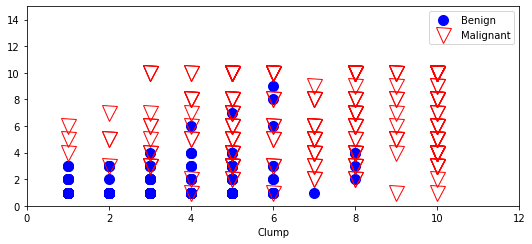

In [259]:
#From above we find there are no-null entry in the data set
#Also, we note that column='BareNuc' is non-numerical !!!
#Visualize Size and shape of benign and malignant cells
benign_df = df[df['Class']==2]
malignant_df = df[df['Class']==4]
axes_0 = benign_df.plot( x='Clump',y='UnifSize', 
                        color='blue', marker='o', markersize=10,linewidth=0,
                         label='Benign')
malignant_df.plot( x='Clump',y='UnifSize', linewidth=0,
                        color='red', marker='v',  markersize=15, markerfacecolor='none', label='Malignant', ax=axes_0)
axes_0.set_ylim(0,15)
axes_0.set_xlim(0,12)

Text(0, 0.5, 'Uniformity of cell size for benign')

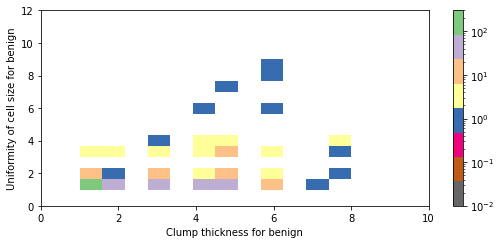

In [291]:
fig, ax=plt.subplots()
plt.hist2d(benign_df['Clump'], benign_df['UnifSize'], bins=12, cmap='Accent_r', norm=mpl.colors.LogNorm(0.01,300))
plt.colorbar()

ax.set_ylim(0,12)
ax.set_xlim(0,10)
ax.set_xlabel('Clump thickness for benign')
ax.set_ylabel('Uniformity of cell size for benign')

Text(0, 0.5, 'Uniformity of cell size malignant')

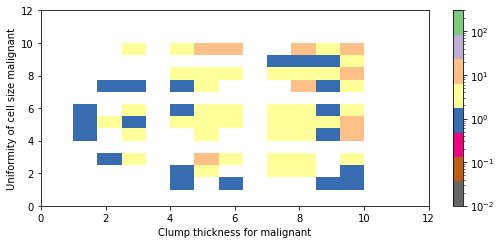

In [292]:
fig0, ax0=plt.subplots()
plt.hist2d(malignant_df['Clump'], malignant_df['UnifSize'], bins=12, 
           cmap='Accent_r', norm=mpl.colors.LogNorm(0.01,300))
plt.colorbar()

ax0.set_ylim(0,12)
ax0.set_xlim(0,12)
ax0.set_xlabel('Clump thickness for malignant')
ax0.set_ylabel('Uniformity of cell size malignant')

In [262]:
#Identify unwanted rows
#Columns 'BareNuc' is non-numerical data
display(df.isnull().sum())
df_new = df[ pd.to_numeric(df['BareNuc'], errors='coerce').notnull() ]
df_new['BareNuc'] = df_new['BareNuc'].astype('int')
df_new.dtypes

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

/var/folders/0_/s4qq72292hz9nrxssxh6fp140000gn/T/ipykernel_51595/2195259684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['BareNuc'] = df_new['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Import library for splitting data set into training and test set
# from sklearn.model_selection import train_test_split

In [263]:
df_new.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [264]:
from sklearn.model_selection import train_test_split
#Create training data set by converting pandas data frame into numpy arrary
#which are input to SVM function
#Select all columns except ID and class
df_x = df_new.iloc[:,1:-1]
display(df_x.head())

# independent variables as numpy array
X = np.asarray(df_x)
display(X)

#dependent variables as numpy array
y = np.asarray(df_new['Class'])

#Import library for splitting data sets into training and test set
#from sklearn.model_selection import train_test_split

#Training data set X_train, y_train
#Test data set X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
display(X_train.shape)
display(X_test.shape)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

(546, 9)

(137, 9)

# Apply SVM algorithm from Sci-kit learn 
# Kernels are Linear, Polynomial, Radial basis function (RBF), Sigmoid

In [265]:
from sklearn import svm
classifier_lin = svm.SVC(kernel='linear', gamma='auto', C=2)
# penality parameter=C and gamma are tunning parameters
classifier_lin.fit(X_train, y_train)
y_predict_lin = classifier_lin.predict(X_test)



In [266]:
#define a function to plot 2x2 confusion matrix
def plot_confusion_matrix(cnf_mat, LabelS, cmap=plt.cm.Blues):
    plt.imshow(cnf_mat, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(LabelS))
    plt.xticks(tick_marks, LabelS, rotation=45)
    plt.yticks(tick_marks, LabelS)
    for i  in range(0,2):
        for j in range(0,2):
            plt.text(i,j,cnf_mat[i][j])

#Retrive classification report and consfusion matrix
from sklearn.metrics import classification_report, confusion_matrix
def EvaluateModel(y_test, y_predict):
    print( classification_report(y_test, y_predict) )
    cnf_mat = confusion_matrix(y_test, y_predict, labels=[2,4])
    print(cnf_mat)
    plot_confusion_matrix(cnf_mat, LabelS=['Benign(2)','Malignant(4)'])


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

[[85  5]
 [ 0 47]]


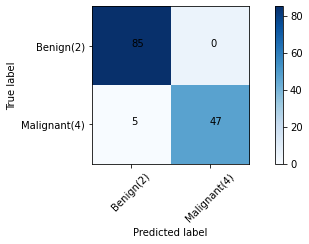

In [267]:
# Kernel function 'Linear'
EvaluateModel(y_test, y_predict_lin) 



              precision    recall  f1-score   support

           2       0.98      0.97      0.97        90
           4       0.94      0.96      0.95        47

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

[[87  3]
 [ 2 45]]


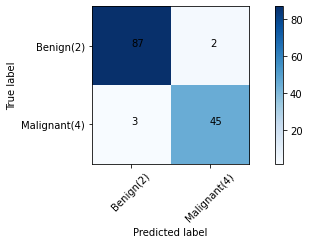

In [268]:
# Kernel function 'Polynomial'    
classifier_poly = svm.SVC(kernel='poly', degree=8)
classifier_poly.fit(X_train, y_train)
y_predict_poly = classifier_poly.predict(X_test) 
EvaluateModel(y_test, y_predict_poly) 

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

[[85  5]
 [ 0 47]]


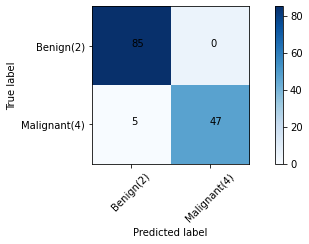

In [287]:
# Kernel function 'rbf'    
classifier_rbf = svm.SVC(kernel='rbf', C=20, gamma='scale')  #gamma is 'scale'(default), 'auto', or float
classifier_rbf.fit(X_train, y_train)
y_predict_rbf = classifier_rbf.predict(X_test) 
EvaluateModel(y_test, y_predict_rbf) 

# Sigmoid function is defined as
$\sigma (x) = \frac{1}{1+e^{-x}}$

              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

[[54 36]
 [47  0]]


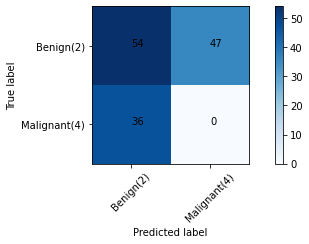

In [277]:
# Kernel function 'Sigmoid'    
classifier_sgmd = svm.SVC(kernel='sigmoid', C=1,gamma='scale')
classifier_sgmd.fit(X_train, y_train)
y_predict_sgmd = classifier_sgmd.predict(X_test) 
EvaluateModel(y_test, y_predict_sgmd) 

### In above analysis we find that sigmoid kernel gives poorest accuracy. While linear, polynomial with degree=8, and RBF gives same accuracy.